In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [6]:
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [7]:
data = pd.read_csv('football_data_clean.csv')

In [8]:
data.IR = data.IR.str[:-1]

Here we found out that some players have exceptionally high release clause and high Value even though there
Overall rating is quite low and as we have domain knowledge of the particular field we found out that these
players were also not from the known big leagues so these Values and Release Clause must be in Thousands 
rather than in Millions so we changed those values

In [9]:
data[(data['Release Clause']>100) & (data['OVA']<77)]

,Name,Age,OVA,POT,Team,Height,Weight,foot,BOV,BP,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
39,J. Micolta,19,58,68,Deportivo Pasto,171,68,Right,61,CM,10,450.0,0.500,698.0,280,55,58,55,60,52.0,276,55,50.0,55,55,61,319,64,65,65.0,58,67.0,295,55,65.0,59,55,61,282,53,55,58,58.0,58,55.0,166,58,58,50.0,46,13,8,7,6,12,1664,351,1,65,58,57,59,56,56
567,21 B. Al Seliteen,29,59,59,Al Adalah,176,68,Right,59,CM,0,220.0,0.004,363.0,272,61,40,47,64,60.0,300,60,63.0,46,66,65,295,54,46,73.0,53,69.0,309,52,78.0,59,66,54,278,70,54,52,61.0,41,64.0,136,46,44,46.0,51,9,15,6,14,7,1641,335,1,50,47,62,63,47,66
806,Z. Gordon,28,66,66,Western Sydney Wanderers,180,77,Right,66,CB,0,725.0,0.003,906.0,226,58,31,58,54,25.0,224,62,29.0,32,41,60,337,74,77,73.0,60,53.0,303,41,78.0,81,79,24,266,76,63,46,39.0,42,56.0,194,65,65,64.0,51,6,11,15,10,9,1601,362,1,76,33,48,62,64,79
834,A. Greab,29,63,63,Campionii FC Arges,196,90,Right,63,GK,0,325.0,0.001,439.0,71,12,10,17,24,8.0,74,9,12.0,12,23,18,201,33,34,48.0,62,24.0,223,39,67.0,42,68,7,103,23,9,10,48.0,13,30.0,41,11,12,18.0,304,57,66,52,60,69,1017,337,1,57,66,52,69,33,60
903,21 G. Fuentes,18,56,76,San Jose Earthquakes,168,68,Right,58,CAM,20,400.0,0.500,980.0,217,38,41,38,57,43.0,264,63,49.0,36,52,64,337,67,66,74.0,51,79.0,252,48,60.0,49,56,39,229,47,34,49,53.0,46,61.0,120,49,34,37.0,50,15,8,11,9,7,1469,316,1,66,43,50,65,39,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,20 M. Grösch,25,62,65,FC Carl Zeiss Jena,188,81,Right,63,CB,3,350.0,0.500,534.0,170,21,18,56,51,24.0,160,22,20.0,24,50,44,285,61,54,59.0,55,56.0,273,35,71.0,70,80,17,227,59,62,38,36.0,32,54.0,185,61,63,61.0,47,8,14,8,9,8,1347,289,1,57,23,39,36,61,73
2640,19 Gorka Giralt,22,62,72,Real Oviedo,190,79,Left,61,GK,10,375.0,0.002,675.0,55,11,7,11,21,5.0,68,9,14.0,13,22,10,217,37,43,44.0,57,36.0,190,24,65.0,28,64,9,94,21,14,7,34.0,18,40.0,36,9,14,13.0,299,63,61,50,60,65,959,339,1,63,61,50,65,40,60
2648,J. Brimmer,23,63,68,Melbourne Victory,169,68,Right,65,CM,5,725.0,0.002,961.0,277,59,56,54,68,40.0,327,66,57.0,69,67,68,314,68,68,62.0,55,61.0,299,55,70.0,67,56,51,289,57,54,55,59.0,64,59.0,172,54,60,58.0,56,12,13,10,10,11,1734,367,1,68,54,64,65,56,60
2657,18 J. Lichtenauer,18,57,73,Chacarita Juniors,180,75,Right,56,GK,16,170.0,0.001,353.0,77,14,8,17,29,9.0,80,12,9.0,11,28,20,176,22,23,34.0,51,46.0,166,22,58.0,25,51,10,97,29,7,7,38.0,16,39.0,32,8,11,13.0,281,59,57,51,54,60,909,304,1,59,57,51,60,23,54


In [10]:
for i in range(data.Name.count()):
    if((data.loc[i]['Release Clause']>50) & (data.loc[i]['OVA']<77)):
        data.loc[i,'Release Clause'] = 0.001 * data.loc[i,'Release Clause']
        data.loc[i,'Value']  = 0.001 * data.loc[i,'Value']
        print(data.loc[i])

Name                     J. Micolta
Age                              19
OVA                              58
POT                              68
Team                Deportivo Pasto
Height                          171
Weight                           68
foot                          Right
BOV                              61
BP                               CM
Growth                           10
Value                          0.45
Wage                            0.5
Release Clause                0.698
Attacking                       280
Crossing                         55
Finishing                        58
Heading Accuracy                 55
Short Passing                    60
Volleys                        52.0
Skill                           276
Dribbling                        55
Curve                          50.0
FK Accuracy                      55
Long Passing                     55
Ball Control                     61
Movement                        319
Acceleration                

Name                20 R. Wallace
Age                            34
OVA                            67
POT                            67
Team                   St. Mirren
Height                        167
Weight                         64
foot                         Left
BOV                            68
BP                            CAM
Growth                          0
Value                       0.375
Wage                        0.003
Release Clause              0.656
Attacking                     292
Crossing                       73
Finishing                      60
Heading Accuracy               39
Short Passing                  66
Volleys                      54.0
Skill                         356
Dribbling                      66
Curve                        75.0
FK Accuracy                    74
Long Passing                   70
Ball Control                   71
Movement                      373
Acceleration                   68
Sprint Speed                   65
Agility       

Name                   M. Figueroa
Age                             38
OVA                             68
POT                             68
Team                Houston Dynamo
Height                         181
Weight                          85
foot                          Left
BOV                             68
BP                              CB
Growth                           0
Value                         0.22
Wage                         0.002
Release Clause               0.319
Attacking                      301
Crossing                        62
Finishing                       49
Heading Accuracy                69
Short Passing                   64
Volleys                       57.0
Skill                          306
Dribbling                       53
Curve                         59.0
FK Accuracy                     72
Long Passing                    63
Ball Control                    59
Movement                       277
Acceleration                    48
Sprint Speed        

Name                   A. Wright
Age                           24
OVA                           61
POT                           66
Team                Sligo Rovers
Height                       183
Weight                        72
foot                       Right
BOV                           63
BP                            ST
Growth                         5
Value                        0.5
Wage                        0.55
Release Clause             0.813
Attacking                    261
Crossing                      36
Finishing                     62
Heading Accuracy              58
Short Passing                 52
Volleys                     53.0
Skill                        263
Dribbling                     58
Curve                       58.0
FK Accuracy                   41
Long Passing                  47
Ball Control                  59
Movement                     317
Acceleration                  73
Sprint Speed                  74
Agility                     52.0
Reactions 

Name                      A. Boruc
Age                             41
OVA                             70
POT                             70
Team                Legia Warszawa
Height                         193
Weight                          88
foot                         Right
BOV                             70
BP                              GK
Growth                           0
Value                         0.18
Wage                         0.003
Release Clause               0.252
Attacking                       72
Crossing                        12
Finishing                       11
Heading Accuracy                11
Short Passing                   25
Volleys                       13.0
Skill                           98
Dribbling                       14
Curve                         13.0
FK Accuracy                     19
Long Passing                    34
Ball Control                    18
Movement                       183
Acceleration                    22
Sprint Speed        

Name                              M. Miers
Age                                     31
OVA                                     66
POT                                     66
Team                Club Atlético Aldosivi
Height                                 185
Weight                                  81
foot                                  Left
BOV                                     66
BP                                      CB
Growth                                   0
Value                                0.575
Wage                                 0.004
Release Clause                       0.863
Attacking                              222
Crossing                                39
Finishing                               28
Heading Accuracy                        70
Short Passing                           52
Volleys                               33.0
Skill                                  183
Dribbling                               36
Curve                                 29.0
FK Accuracy

In [11]:
for i in range(data.Name.count()):
    if((data.loc[i]['Release Clause']<5) & (data.loc[i]['OVA']<77) & (data.loc[i]['Value']>50)):
          data.loc[i,'Value']  = 0.001 * data.loc[i,'Value']
        
        

In [12]:
data[(data['Team'] == 'Manchester City') & (data['BP']=='CAM')]

,Name,Age,OVA,POT,Team,Height,Weight,foot,BOV,BP,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
59,Ferran Torres,21,82,90,Manchester City,184,77,Right,84,CAM,8,68.5,0.120,140.4,387,77,81,75,80,74.0,375,84,71.0,60,78,82,404,87,78,82.0,81,76.0,373,79,75.0,73,70,76,313,45,34,84,84.0,66,82.0,87,35,24,28.0,59,12,9,11,15,12,1998,423,1,82,79,78,83,35,66
60,P. Foden,21,84,92,Manchester City,171,69,Left,87,CAM,8,94.5,0.125,193.7,345,75,79,47,85,59.0,390,87,73.0,63,78,89,433,86,82,91.0,83,91.0,335,82,49.0,80,47,77,354,64,59,82,85.0,64,84.0,164,58,59,47.0,52,8,15,6,10,13,2073,445,3,84,78,80,88,56,59
171,J. Grealish,25,84,85,Manchester City,180,81,Right,85,CAM,1,50.5,0.180,97.2,351,81,77,36,85,72.0,411,89,78.0,74,82,88,408,81,79,85.0,79,84.0,338,76,32.0,80,70,80,328,60,44,81,85.0,58,88.0,140,48,49,43.0,51,11,6,11,10,13,2027,442,3,80,76,83,88,46,69


In [13]:
positions = dict(data.BP.value_counts())

In [14]:
position_lables = list(positions.keys())

In [15]:
position_values = list(positions.values())

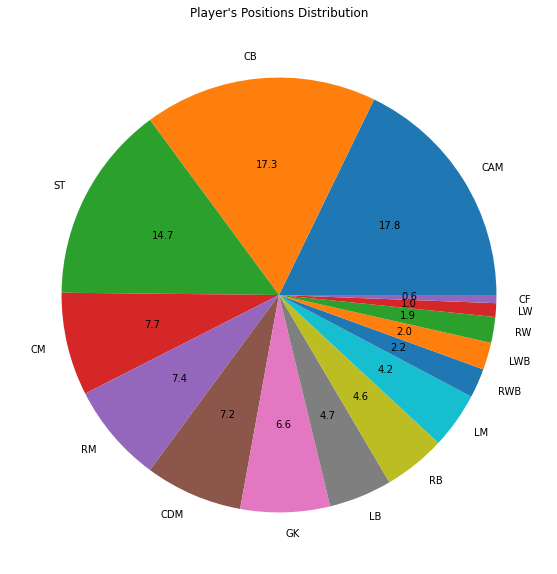

In [16]:

plt.figure(figsize=(10,10))
loc=data.BP.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Player's Positions Distribution")
plt.ylabel("")
plt.show()



In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2663 non-null   object 
 1   Age               2663 non-null   int64  
 2   OVA               2663 non-null   int64  
 3   POT               2663 non-null   int64  
 4   Team              2663 non-null   object 
 5   Height            2663 non-null   int64  
 6   Weight            2663 non-null   int64  
 7   foot              2663 non-null   object 
 8   BOV               2663 non-null   int64  
 9   BP                2663 non-null   object 
 10  Growth            2663 non-null   int64  
 11  Value             2663 non-null   float64
 12  Wage              2663 non-null   float64
 13  Release Clause    2663 non-null   float64
 14  Attacking         2663 non-null   int64  
 15  Crossing          2663 non-null   int64  
 16  Finishing         2663 non-null   int64  


In [18]:
data.IR = pd.to_numeric(data['IR'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2663 non-null   object 
 1   Age               2663 non-null   int64  
 2   OVA               2663 non-null   int64  
 3   POT               2663 non-null   int64  
 4   Team              2663 non-null   object 
 5   Height            2663 non-null   int64  
 6   Weight            2663 non-null   int64  
 7   foot              2663 non-null   object 
 8   BOV               2663 non-null   int64  
 9   BP                2663 non-null   object 
 10  Growth            2663 non-null   int64  
 11  Value             2663 non-null   float64
 12  Wage              2663 non-null   float64
 13  Release Clause    2663 non-null   float64
 14  Attacking         2663 non-null   int64  
 15  Crossing          2663 non-null   int64  
 16  Finishing         2663 non-null   int64  


In [20]:
data.describe()

,Age,OVA,POT,Height,Weight,BOV,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
count,2663.000000,2663.000000,2663.000000,2663.000000,2663.00000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.000000,2663.00000,2663.000000
mean,24.205032,72.072475,78.434472,181.369133,74.92377,73.229816,6.361998,11.319112,0.083045,21.869153,285.310176,57.003755,53.868569,57.225685,66.954938,50.257229,297.346226,65.070973,55.853924,48.313932,60.633496,67.473902,346.213293,70.392415,70.390537,69.048442,68.656027,67.725873,321.070597,64.655276,66.738641,67.969208,66.939542,54.767931,287.073601,61.372512,51.579422,58.630492,62.005257,53.485918,66.578295,154.564777,51.589561,52.988359,49.986857,71.607210,14.380023,14.285768,14.180248,14.259106,14.502065,1763.185881,388.012768,1.435223,72.498686,59.638378,64.177995,69.822756,54.23620,67.638753
std,4.774952,7.620778,5.800344,6.897068,7.31885,7.411673,5.777916,17.764098,0.174649,34.220616,72.438818,18.177127,20.138196,17.009227,13.325219,18.661471,76.126927,17.495686,18.771633,18.253120,14.472003,15.150286,52.396092,13.862761,13.783093,13.904833,9.883676,13.956973,49.662440,13.386212,12.389559,14.761916,12.725373,19.584495,63.253398,16.894338,22.021598,19.471631,13.724316,15.897838,11.811337,64.644298,21.114837,22.277606,22.244598,77.672667,16.077519,15.458501,15.051570,15.717969,16.479933,263.329974,43.152663,0.779763,10.956916,14.813628,10.650616,9.748342,18.11909,10.120916
min,16.000000,47.000000,47.000000,162.000000,53.00000,47.000000,0.000000,0.000000,0.000000,0.000000,49.000000,7.000000,3.000000,8.000000,13.000000,4.000000,59.000000,5.000000,8.000000,8.000000,12.000000,10.000000,125.000000,15.000000,14.000000,21.000000,31.000000,21.000000,148.000000,14.000000,29.000000,16.000000,29.000000,4.000000,66.000000,12.000000,6.000000,3.000000,14.000000,9.000000,20.000000,26.000000,5.000000,9.000000,8.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,811.000000,246.000000,1.000000,26.000000,22.000000,26.000000,30.000000,16.00000,34.000000
25%,21.000000,67.000000,75.000000,176.000000,70.00000,68.000000,0.500000,1.500000,0.006000,3.000000,255.000000,46.000000,40.000000,49.000000,62.000000,37.000000,263.000000,60.000000,44.000000,35.000000,52.000000,63.000000,318.000000,64.000000,64.000000,62.000000,62.000000,60.000000,289.000000,56.000000,59.000000,61.500000,59.000000,43.000000,256.000000,51.000000,31.000000,50.000000,54.000000,43.000000,59.000000,97.000000,33.000000,33.000000,29.000000,47.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1614.500000,359.000000,1.000000,66.000000,50.000000,57.000000,64.000000,38.00000,61.000000
50%,23.000000,73.000000,79.000000,181.000000,75.00000,74.000000,5.000000,4.000000,0.019000,7.800000,295.000000,62.000000,59.000000,59.000000,69.000000,52.000000,307.000000,69.000000,59.000000,47.000000,63.000000,71.000000,354.000000,73.000000,73.000000,71.000000,69.000000,70.000000,327.000000,66.000000,68.000000,70.000000,68.000000,60.00

In [21]:
data.to_csv("football_final.csv")

In [22]:
data.to_pickle("Players_final_list_Pickle")

In [23]:
clean_data = pd.read_pickle("Players_final_list_Pickle")

In [24]:
clean_data.nlargest(5,columns='Value')[["OVA","Release Clause","Name","Age","Team","Value"]]

,OVA,Release Clause,Name,Age,Team,Value
27,91,373.5,K. Mbappé,22,Paris Saint-Germain,194.0
14,88,272.7,E. Haaland,20,Borussia Dortmund,143.5
201,90,246.1,H. Kane,27,Tottenham Hotspur,129.5
226,90,246.1,H. Kane,27,Tottenham Hotspur,129.5
297,91,238.7,Neymar Jr,29,Paris Saint-Germain,129.0


In [25]:
data = clean_data.drop_duplicates(subset=None,keep="first")

In [26]:
data

,Name,Age,OVA,POT,Team,Height,Weight,foot,BOV,BP,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,19 Malcom,21,82,89,FC Barcelona,172,74,Left,82,CAM,7,31.000,0.140,70.900,362,79,75,57,80,71.0,401,85,77.0,81,73,85,424,87,82,92.0,79,84.0,366,85,58.0,74,64,85,306,53,26,78,81.0,68,78.0,66,21,28,17.0,53,8,14,15,7,9,1978,418,2,84,79,79,85,27,64
1,O. Richards B,23,74,82,FC Bayern München,174,74,Left,74,LB,8,9.000,0.040,16.700,274,63,56,53,68,34.0,287,71,55.0,34,53,74,393,84,79,82.0,68,80.0,273,43,71.0,80,48,31,292,77,69,56,54.0,36,62.0,215,66,74,75.0,54,11,9,13,10,11,1788,392,1,81,46,60,73,69,63
2,18 S. Azmoun,22,76,84,Rubin Kazan,186,79,Right,75,ST,8,11.500,0.050,20.700,362,64,76,84,67,71.0,326,73,66.0,50,63,74,385,79,79,77.0,74,76.0,372,73,90.0,65,72,72,293,67,34,77,60.0,55,65.0,104,39,33,32.0,54,6,10,14,9,15,1896,400,1,79,73,64,74,40,70
3,Arthur Cabral,23,77,85,FC Basel,186,89,Right,79,ST,8,23.500,0.016,40.000,357,50,79,78,74,76.0,298,73,63.0,30,56,76,358,72,72,72.0,74,68.0,392,78,83.0,74,87,70,305,61,24,77,68.0,75,71.0,79,27,27,25.0,54,12,9,14,13,6,1843,395,1,72,77,63,74,31,78
4,F. Mendy,26,83,86,Real Madrid CF,180,73,Left,84,LWB,3,43.500,0.170,92.400,343,78,63,72,80,50.0,343,80,72.0,35,78,78,424,91,92,81.0,82,78.0,384,69,79.0,89,83,64,365,82,79,80,75.0,49,78.0,238,77,81,80.0,51,7,16,9,10,9,2148,473,1,92,64,76,79,78,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,N. Zanellato,23,63,72,Crotone,187,80,Right,65,CAM,9,1.100,0.750,1.900,279,61,40,62,70,46.0,336,70,67.0,64,66,69,322,66,60,69.0,59,68.0,292,62,55.0,52,61,62,274,45,55,55,60.0,59,60.0,171,47,63,61.0,47,10,11,12,6,8,1721,358,1,63,51,65,68,56,55
2656,E. Hamilton,22,64,72,Accrington Stanley,187,75,Left,66,CM,8,1.300,0.001,2.500,302,59,58,64,67,54.0,299,64,55.0,50,64,66,310,67,58,62.0,63,60.0,351,74,60.0,72,73,72,301,76,55,56,64.0,50,65.0,167,59,54,54.0,43,7,11,5,9,11,1773,382,1,62,63,63,64,57,73
2657,18 J. Lichtenauer,18,57,73,Chacarita Juniors,180,75,Right,56,GK,16,0.170,0.001,0.353,77,14,8,17,29,9.0,80,12,9.0,11,28,20,176,22,23,34.0,51,46.0,166,22,58.0,25,51,10,97,29,7,7,38.0,16,39.0,32,8,11,13.0,281,59,57,51,54,60,909,304,1,59,57,51,60,23,54
2658,L. Reis,21,71,79,Hamburger SV,178,78,Right,73,CM,8,4.200,0.007,7.600,287,54,54,57,74,48.0,312,72,54.0,44,69,73,368,71,78,74.0,71,74.0,351,66,80.0,80,66,59,324,69,72,59,73.0,51,68.0,200,68,68,64.0,57,10,15,14,11,7,1899,409,1,75,57,67,72,67,71


In [27]:
data.nlargest(10,columns='Value')[["OVA","Release Clause","Name","Age","Team","Value"]]

,OVA,Release Clause,Name,Age,Team,Value
27,91,373.5,K. Mbappé,22,Paris Saint-Germain,194.0
14,88,272.7,E. Haaland,20,Borussia Dortmund,143.5
201,90,246.1,H. Kane,27,Tottenham Hotspur,129.5
297,91,238.7,Neymar Jr,29,Paris Saint-Germain,129.0
68,91,232.2,K. De Bruyne,30,Manchester City,125.5
45,87,253.9,F. de Jong,24,FC Barcelona,119.5
102,92,197.2,R. Lewandowski,32,FC Bayern München,119.5
184,89,230.0,G. Donnarumma,22,Paris Saint-Germain,119.5
94,90,217.4,M. Salah,29,Liverpool,117.5
1006,91,238.0,J. Oblak,28,Atlético de Madrid,112.0


In [28]:
data.nlargest(10,columns="OVA")[["Name","Age","Team","OVA","Release Clause","Value"]]

,Name,Age,Team,OVA,Release Clause,Value
19,L. Messi,34,Paris Saint-Germain,93,144.3,78.0
102,R. Lewandowski,32,FC Bayern München,92,197.2,119.5
27,K. Mbappé,22,Paris Saint-Germain,91,373.5,194.0
68,K. De Bruyne,30,Manchester City,91,232.2,125.5
167,Cristiano Ronaldo,36,Manchester United,91,83.3,45.0
297,Neymar Jr,29,Paris Saint-Germain,91,238.7,129.0
1006,J. Oblak,28,Atlético de Madrid,91,238.0,112.0
94,M. Salah,29,Liverpool,90,217.4,117.5
95,N. Kanté,30,Chelsea,90,185.0,100.0
176,M. Neuer,35,FC Bayern München,90,22.3,13.5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


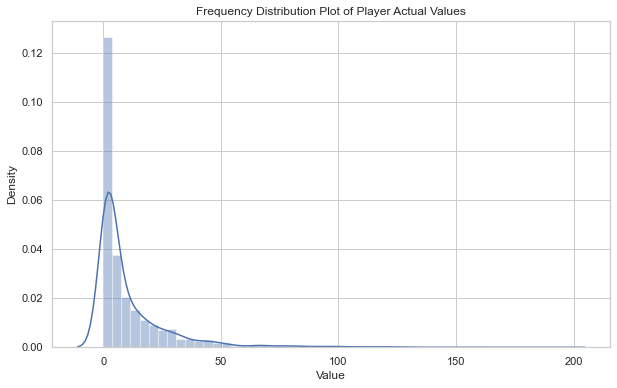

In [29]:


x = data.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()



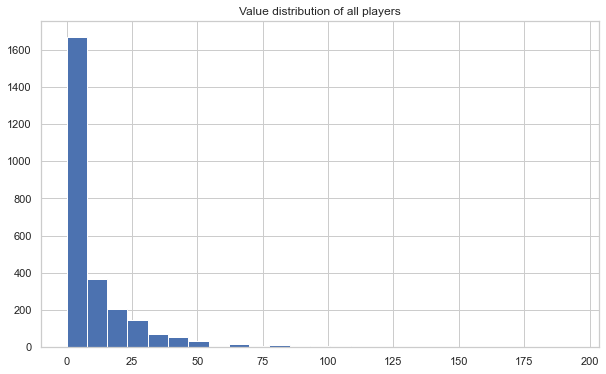

In [30]:


plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=data)
plt.title('Value distribution of all players')
plt.show()



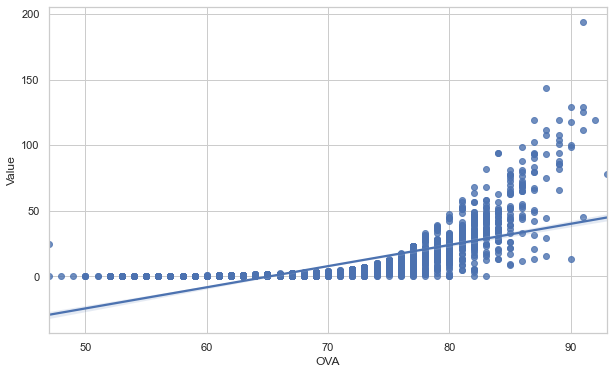

In [31]:


plt.figure(figsize=(10,6))
sns.regplot(x="OVA",y="Value",data=data)
plt.show()



<Figure size 2000x2000 with 0 Axes>

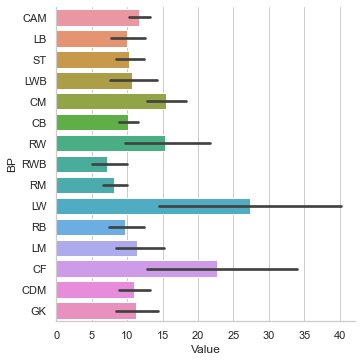

In [32]:


plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="BP", x="Value", kind="bar",  data=data)
plt.show()



In [33]:
#View the correlations
corr_mat = data.corr()
corr_mat



,Age,OVA,POT,Height,Weight,BOV,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
Age,1.000000,0.515033,-0.177468,0.094789,0.257350,0.456027,-0.854646,0.175493,-0.164969,0.157017,0.236117,0.185525,0.138368,0.200132,0.221762,0.245997,0.211053,0.067950,0.225090,0.256109,0.258591,0.147733,-0.044346,-0.206618,-0.188248,-0.062563,0.504242,-0.068262,0.331171,0.356858,0.193155,0.058956,0.320060,0.222108,0.304954,0.271078,0.183962,0.146139,0.285673,0.245631,0.449831,0.130594,0.171358,0.119891,0.096752,0.117904,0.114062,0.115868,0.112932,0.123289,0.115031,0.319653,0.420519,0.538579,-0.185887,0.333721,0.421131,0.284003,0.223990,0.390654
OVA,0.515033,1.000000,0.657186,0.079149,0.181257,0.989981,-0.654262,0.702100,-0.190651,0.693012,0.460052,0.393569,0.324686,0.304941,0.563837,0.371727,0.467074,0.370317,0.407016,0.359645,0.541612,0.464245,0.349213,0.142160,0.168569,0.232997,0.917263,0.125851,0.587605,0.569300,0.280772,0.390244,0.365995,0.392495,0.523995,0.384007,0.306325,0.346941,0.578580,0.329882,0.757212,0.253251,0.297651,0.245467,0.207524,0.072455,0.071554,0.067924,0.070699,0.073213,0.073584,0.651399,0.865506,0.638334,0.230240,0.520714,0.753965,0.719012,0.350771,0.567637
POT,-0.177468,0.657186,1.000000,0.026877,0.000421,0.689270,0.140049,0.616150,-0.012060,0.623275,0.269395,0.221556,0.210920,0.139500,0.399582,0.189850,0.305077,0.295321,0.231201,0.175974,0.363164,0.346311,0.336961,0.231041,0.243055,0.241939,0.572362,0.152009,0.299374,0.316128,0.112157,0.257080,0.101176,0.213137,0.286756,0.162755,0.150642,0.212681,0.383846,0.168716,0.460556,0.134976,0.150078,0.135454,0.114100,0.029724,0.031227,0.024668,0.031751,0.026475,0.032238,0.396722,0.555002,0.363274,0.316542,0.303254,0.475904,0.533075,0.177911,0.248248
Height,0.094789,0.079149,0.026877,1.000000,0.756259,0.073137,-0.077007,0.042153,-0.034115,0.041171,-0.308508,-0.463681,-0.352411,0.166322,-0.278208,-0.318719,-0.421073,-0.452413,-0.428363,-0.392476,-0.228200,-0.372012,-0.600564,-0.521207,-0.357499,-0.648185,0.061304,-0.783141,-0.058832,-0.143908,0.141572,-0.224430,0.593595,-0.356752,-0.255245,0.012717,0.029676,-0.411300,-0.337060,-0.277140,-0.115449,0.016694,0.019509,0.013087,0.016884,0.327531,0.322896,0.321588,0.320111,0.322165,0.327464,-0.297885,-0.040844,0.067823,-0.300184,-0.115603,-0.177489,-0.273838,0.156131,0.490775
Weight,0.257350,0.181257,0.000421,0.756259,1.000000,0.166759,-0.237689,0.095184,-0.054292,0.089940,-0.196063,-0.352067,-0.255844,0.207792,-0.179687,-0.203217,-0.306571,-0.351537,-0.319888,-0.277645,-0.141972,-0.268220,-0.487201,-0.459717,-0.306024,-0.558326,0.157593,-0.626481,0.081367,-0.004090,0.216136,-0.161031,0.668252,-0.239974,-0.141597,0.104620,0.050368,-0.303504,-0.233075,-0.172690,-0.007149,0.036672,0.045079,0.034411,0.029308,0.280945,0.274798,0.273541,0.278071,0.277276,0.281087,-0.166373,0.067815,0.174805,-0.271215,-0.022065,-0.079597,-0.173598,0.168052,0.565319
BOV,0.456027,0.989981,0.689270,0.073137,0.166759,1.000000,-0.608908,0.705443,-0.187489,0.698306,0.486163,0.399046,0.352886,0.328817,0.598305,0.390942,0.492109,0.401792,0.419561,0.371426,0.568586,0.498155,0.377206,0.172685,0.200407,0.257288,0.915452,0.146318,0.607655,0.578847,0.278346,0.419427,0.367169,0.415611,0.546627,0.399460,0.315987,0.368827,0.595597,0.348701,0.772753,0.265699,0.309973,0.258713,0.218732,0.031287,0.030470,0.027578,0.030831,0.032610,0.032610,0.671507,0.860817,0.610966,0.239724,0.514017,0.744551,0.714563,0.350967,0.560941
Growth,-0.854646,-0.654262,0.140049,-0.077007,-0.237689,-0.608908,1.000000,-0.304097,0.238350,-0.285

In [34]:
corr_mat.sort_values('Value',ascending=True)



,Age,OVA,POT,Height,Weight,BOV,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
Growth,-0.854646,-0.654262,0.140049,-0.077007,-0.237689,-0.608908,1.000000,-0.304097,0.238350,-0.285009,-0.334050,-0.294714,-0.214898,-0.260619,-0.339763,-0.297833,-0.307473,-0.190155,-0.302702,-0.295886,-0.347108,-0.262384,-0.120652,0.045068,0.022432,-0.063326,-0.630684,-0.012803,-0.471532,-0.430675,-0.256306,-0.254703,-0.379277,-0.301751,-0.400630,-0.341152,-0.251258,-0.242365,-0.374919,-0.264070,-0.532614,-0.197255,-0.240430,-0.186550,-0.158132,-0.065358,-0.062666,-0.064477,-0.061016,-0.069614,-0.064318,-0.457660,-0.580111,-0.474057,0.015150,-0.379767,-0.512949,-0.409667,-0.282284,-0.496599
GK Handling,0.115868,0.067924,0.024668,0.321588,0.273541,0.027578,-0.064477,0.026824,-0.009852,0.029394,-0.717422,-0.613815,-0.545650,-0.656005,-0.659450,-0.529771,-0.665485,-0.741868,-0.554391,-0.471891,-0.500032,-0.753968,-0.519733,-0.522598,-0.531570,-0.446603,0.009929,-0.470427,-0.508024,-0.245183,-0.085713,-0.622972,-0.057351,-0.560206,-0.679091,-0.533587,-0.408116,-0.642169,-0.293446,-0.531278,-0.356053,-0.444650,-0.444714,-0.450172,-0.419097,0.985825,0.967372,1.000000,0.961756,0.964548,0.966451,-0.570018,0.113111,0.057515,0.036683,0.214811,0.142793,0.159046,-0.168300,0.126890
GK Positioning,0.123289,0.073213,0.026475,0.322165,0.277276,0.032610,-0.069614,0.029215,-0.006717,0.031189,-0.713738,-0.612070,-0.543292,-0.648559,-0.657448,-0.527928,-0.664722,-0.740184,-0.553610,-0.473861,-0.498699,-0.751952,-0.518843,-0.521489,-0.531070,-0.448759,0.015074,-0.470159,-0.498530,-0.241242,-0.076448,-0.612752,-0.048504,-0.558126,-0.674032,-0.527158,-0.400671,-0.638854,-0.294708,-0.531266,-0.352509,-0.439531,-0.439398,-0.445345,-0.414101,0.985879,0.966501,0.964548,0.961343,1.000000,0.967351,-0.564328,0.119892,0.062373,0.037437,0.215569,0.143286,0.160367,-0.162146,0.141058
GK Diving,0.114062,0.071554,0.031227,0.322896,0.274798,0.030470,-0.062666,0.029334,-0.009613,0.031242,-0.715992,-0.612196,-0.542766,-0.657090,-0.660671,-0.527044,-0.664722,-0.740346,-0.552361,-0.472510,-0.500087,-0.753610,-0.519494,-0.521497,-0.530524,-0.447594,0.014155,-0.473647,-0.502347,-0.238753,-0.085287,-0.618415,-0.054696,-0.555621,-0.677080,-0.532540,-0.405780,-0.638634,-0.294677,-0.530888,-0.357266,-0.445471,-0.445791,-0.450711,-0.419921,0.987320,1.000000,0.967372,0.962165,0.966501,0.969992,-0.567562,0.118472,0.058625,0.040520,0.219424,0.144014,0.163259,-0.167361,0.131820
Goalkeeping,0.117904,0.072455,0.029724,0.327531,0.280945,0.031287,-0.065358,0.030993,-0.007016,0.033256,-0.724996,-0.620761,-0.551132,-0.661913,-0.666592,-0.536008,-0.673362,-0.750327,-0.561196,-0.479044,-0.504472,-0.762492,-0.526236,-0.528338,-0.537697,-0.453891,0.013635,-0.478456,-0.508470,-0.242851,-0.084308,-0.625257,-0.052805,-0.565047,-0.685252,-0.537576,-0.410767,-0.647821,-0.297341,-0.537611,-0.360706,-0.449505,-0.449672,-0.455004,-0.423660,1.000000,0.987320,0.985825,0.982922,0.985879,0.987391,-0.574240,0.119826,0.060526,0.039334,0.219717,0.147870,0.163884,-0.168506,0.135851
GK Reflexes,0.115031,0.073584,0.032238,0.327464,0.281087,0.032610,-0.064318,0.033138,-0.005425,0.035798,-0.716445,-0.611859,-0.546164,-0.652457,-0.658402,-0.531310,-0.666002,-0.740549,-0.556116,-0.474799,-0.498001,-0.754394,-0.520278,-0.521276,-0.532002,-0.449181,0.015154,-0.474478,-0.501029,-0.239334,-0.084421,-0.615872,-0.047631,-0.558936,-0.675548,-0.526614,-0.404461,-0.639040,-0.296225,-0.531094,-0.358193,-0.442183,-0.442354,-0.447562,-0.416782,0.987391,0.969992,0.966451,0.96180

In [35]:

Xb= data.drop(columns=["Value","Name","Team","foot","BP"])
Yb= data.loc[:,"Value"]

In [36]:
Xb

,Age,OVA,POT,Height,Weight,BOV,Growth,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,21,82,89,172,74,82,7,0.140,70.900,362,79,75,57,80,71.0,401,85,77.0,81,73,85,424,87,82,92.0,79,84.0,366,85,58.0,74,64,85,306,53,26,78,81.0,68,78.0,66,21,28,17.0,53,8,14,15,7,9,1978,418,2,84,79,79,85,27,64
1,23,74,82,174,74,74,8,0.040,16.700,274,63,56,53,68,34.0,287,71,55.0,34,53,74,393,84,79,82.0,68,80.0,273,43,71.0,80,48,31,292,77,69,56,54.0,36,62.0,215,66,74,75.0,54,11,9,13,10,11,1788,392,1,81,46,60,73,69,63
2,22,76,84,186,79,75,8,0.050,20.700,362,64,76,84,67,71.0,326,73,66.0,50,63,74,385,79,79,77.0,74,76.0,372,73,90.0,65,72,72,293,67,34,77,60.0,55,65.0,104,39,33,32.0,54,6,10,14,9,15,1896,400,1,79,73,64,74,40,70
3,23,77,85,186,89,79,8,0.016,40.000,357,50,79,78,74,76.0,298,73,63.0,30,56,76,358,72,72,72.0,74,68.0,392,78,83.0,74,87,70,305,61,24,77,68.0,75,71.0,79,27,27,25.0,54,12,9,14,13,6,1843,395,1,72,77,63,74,31,78
4,26,83,86,180,73,84,3,0.170,92.400,343,78,63,72,80,50.0,343,80,72.0,35,78,78,424,91,92,81.0,82,78.0,384,69,79.0,89,83,64,365,82,79,80,75.0,49,78.0,238,77,81,80.0,51,7,16,9,10,9,2148,473,1,92,64,76,79,78,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,23,63,72,187,80,65,9,0.750,1.900,279,61,40,62,70,46.0,336,70,67.0,64,66,69,322,66,60,69.0,59,68.0,292,62,55.0,52,61,62,274,45,55,55,60.0,59,60.0,171,47,63,61.0,47,10,11,12,6,8,1721,358,1,63,51,65,68,56,55
2656,22,64,72,187,75,66,8,0.001,2.500,302,59,58,64,67,54.0,299,64,55.0,50,64,66,310,67,58,62.0,63,60.0,351,74,60.0,72,73,72,301,76,55,56,64.0,50,65.0,167,59,54,54.0,43,7,11,5,9,11,1773,382,1,62,63,63,64,57,73
2657,18,57,73,180,75,56,16,0.001,0.353,77,14,8,17,29,9.0,80,12,9.0,11,28,20,176,22,23,34.0,51,46.0,166,22,58.0,25,51,10,97,29,7,7,38.0,16,39.0,32,8,11,13.0,281,59,57,51,54,60,909,304,1,59,57,51,60,23,54
2658,21,71,79,178,78,73,8,0.007,7.600,287,54,54,57,74,48.0,312,72,54.0,44,69,73,368,71,78,74.0,71,74.0,351,66,80.0,80,66,59,324,69,72,59,73.0,51,68.0,200,68,68,64.0,57,10,15,14,11,7,1899,409,1,75,57,67,72,67,71


In [37]:
# fit model with target as player market value 
player_modelb = sm.OLS(Yb, Xb, data=data)

resultsb = player_modelb.fit()




In [38]:
X = data.drop(columns=['Value'])
Y = data['Value']
X_train_String , X_test_String, Y_train, Y_test = train_test_split(X,Y)
X_train = X_train_String.drop(columns = ['Name','Team','foot','BP'])
X_test = X_test_String.drop(columns = ['Name','Team','foot','BP'])

In [39]:
regression = LinearRegression()
regression.fit(X_train,Y_train)
y_pred = regression.predict(X_test)

In [40]:
df = pd.DataFrame({'Name':X_test_String.Name,'Actual': Y_test, 'Predicted': y_pred})
df["Difference"] = df["Actual"]-df["Predicted"]
df_under = round(df.sort_values('Difference').set_index('Name').head(10),2)
df_over = round(df.sort_values('Difference').set_index('Name').tail(10),2)

In [41]:
df_under

,Actual,Predicted,Difference
Name,,,
João Félix,82.0,93.15,-11.15
M. Depay,63.0,69.05,-6.05
19 Malcom,31.0,36.53,-5.53
V. Tsygankov,32.0,37.45,-5.45
Matheus Cunha,35.5,40.83,-5.33
T. Lemar,48.0,52.82,-4.82
M. Ødegaard,49.0,53.82,-4.82
K. Benzema,66.0,70.69,-4.69
Y. En-Nesyri,44.0,48.62,-4.62


In [42]:
df_over

,Actual,Predicted,Difference
Name,,,
N. Lang,28.5,23.02,5.48
M. Škriniar,70.0,64.42,5.58
M. Salah,117.5,111.60,5.90
L. Martínez,78.0,71.67,6.33
L. Insigne,65.5,58.46,7.04
S. Berghuis,30.0,21.81,8.19
T. Müller,66.0,57.57,8.43
L. Goretzka,93.0,83.91,9.09
21 Wendel,39.5,20.70,18.80


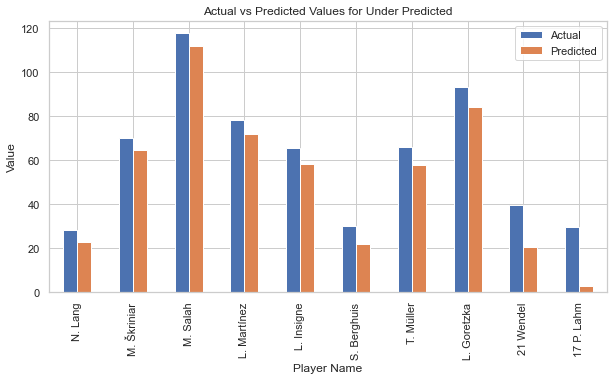

In [43]:
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.title("Actual vs Predicted Values for Under Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

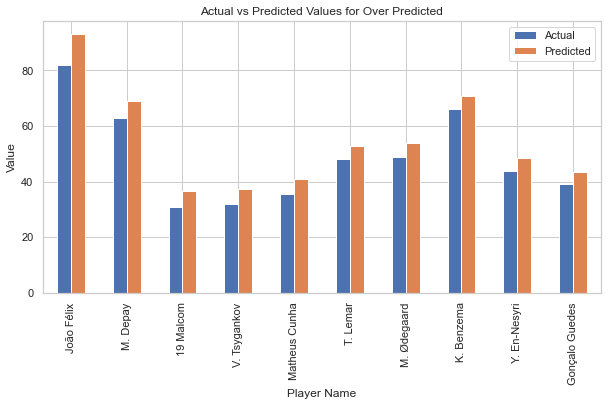

In [44]:
df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,5))
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')
plt.show()

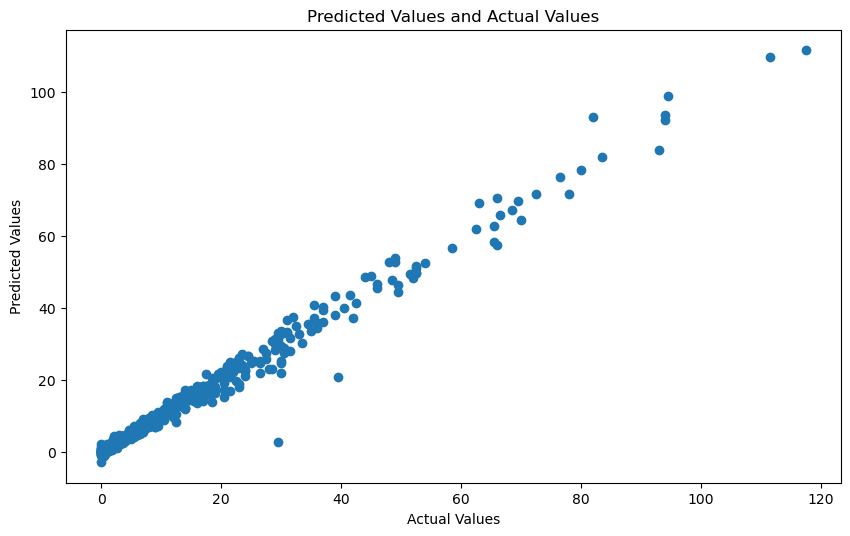

In [45]:
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(Y_test, y_pred);
plt.title("Predicted Values and Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

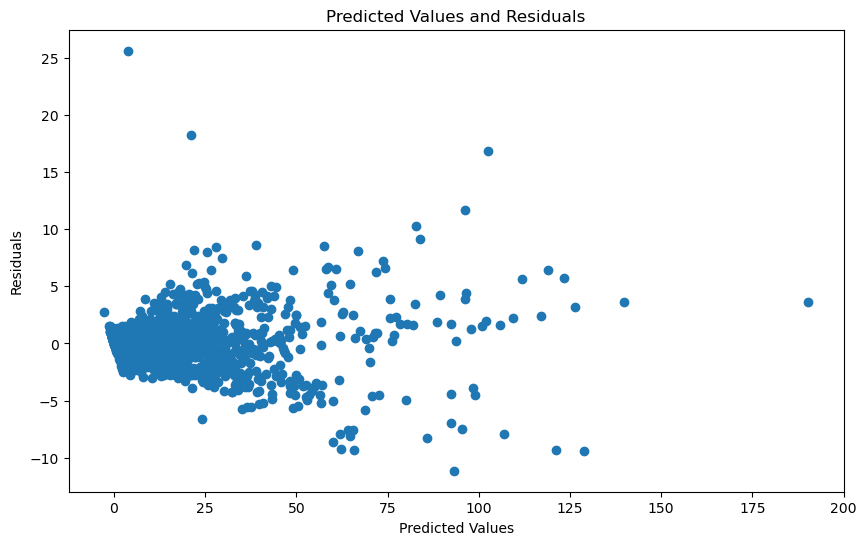

In [46]:
#Plotting Residuals
plt.figure(figsize=(10,6),dpi=100),
plt.style.use('default')
plt.scatter(resultsb.predict(), resultsb.resid);
plt.title("Predicted Values and Residuals")
plt.ylabel("Residuals")
plt.xlabel("Predicted Values")
plt.show()

In [50]:
#set up the 4 models we're choosing from:

X = data.drop(columns = ['Name','Team','foot','BP','Value'])
Y = data['Value']
Y= np.log1p(Y)


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(X.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression for all data R^2: {lm.score(X, Y):.6f}')
print(f'Linear Regression for test data R^2: {lm.score(X_test, y_test):.6f}')
print(f'Linear Regression for validation data R^2: {lm.score(X_val, y_val):.6f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression for test data R^2: {lm_reg.score(X_test_scaled, y_test):.6f}')
print(f'Ridge Regression for validation data R^2: {lm_reg.score(X_val_scaled, y_val):.6f}')
print("")


lm_lasso.fit(X_train,y_train)
print(f'Lasso Regression for test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Lasso Regression for validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression for test data R^2: {lm_poly.score(X_test_poly, y_test):.6f}')
print(f'Degree 2 polynomial regression for validation data R^2: {lm_poly.score(X_val_poly, y_val):.6f}')

Linear Regression for all data R^2: 0.922949
Linear Regression for test data R^2: 0.899029
Linear Regression for validation data R^2: 0.909374

Ridge Regression for test data R^2: 0.896423
Ridge Regression for validation data R^2: 0.907492

Lasso Regression for test data R^2: -0.000798
Lasso Regression for validation data R^2: -0.002754

Degree 2 polynomial regression for test data R^2: 0.728198
Degree 2 polynomial regression for validation data R^2: 0.709759


In [51]:
# Run Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state = 16)
cross_val_score(lm, X, Y, cv=kf, scoring='r2')

print('Linear Regression:',round(np.mean(cross_val_score(lm, X, Y, cv=kf, scoring='r2')),5))
print('Ridge Regression:',round(np.mean(cross_val_score(lm_reg, X, Y, cv=kf, scoring='r2')),5))
print('Lasso Regression:',round(np.mean(cross_val_score(lm_lasso, X, Y, cv=kf, scoring='r2')),5))
print('Degree 2 Poly. Regression:',round(np.mean(cross_val_score(lm_poly, X, Y, cv=kf, scoring='r2')),5))

Linear Regression: 0.91856
Ridge Regression: 0.91756
Lasso Regression: -0.00435
Degree 2 Poly. Regression: 0.91856
